# Make a character network from a text


In [1]:
import nbtext as nb
from nbtext import Corpus
%matplotlib inline

In [73]:
import networkx as nx
import requests
import pandas as pd

def check_navn(navn, limit=2, remove='Ja Nei Nå Dem De Deres Unnskyld Ikke Ah Hmm'.split()):
    """Removes all items in navn with frequency below limit and words in all case as well as all words in list 'remove'"""
    r = {x:navn[x] for x in navn if navn[x] > limit and x.upper() != x and not x in remove}
    return r

def check_edges(G, weight=1):    
    return nx.Graph([edge for edge in G.edges(data=True) if edge[2]['weight'] >= weight])

def freq(urn, words):
    params = {'urn':urn, 'words':words}
    r = requests.post("https://api.nb.no/ngram/freq", json=params)
    return dict(r.json())

In [74]:
freq("2008101004071", "Paris Pierre".split())

{'Paris': 6, 'Pierre': 302}

# Select a list of books

Add metadata in order to select a book.


In [75]:
bøker = nb.get_urn({'title':'krig%', 'author':"tols%", 'trans':'', 'year':1800, 'next':250, 'limit':130})

bøker

[[2008102204034, 'Tolstoj, L.N.', 'Krig og fred', 2000],
 [2007032801091, 'Tolstoj, L.N.', 'Krig og fred', 1962],
 [2008042400005, 'Tolstoj, L.N.', 'Krig og fred', 1951],
 [2011063022002, 'Tolstoj, L.N.', 'Krig og fred', 1967],
 [2011063022003, 'Tolstoj, L.N.', 'Krig og fred', 1967],
 [2015110507062, 'Tolstoj, L.N.', 'Krig og fred', 1928],
 [2011063022004, 'Tolstoj, L.N.', 'Krig og fred', 1967],
 [2011063023001, 'Tolstoj, L.N.', 'Krig og fred', 1967],
 [2014100308012, 'Tolstoj, L.N.', 'Krig og fred', 1929],
 [2008101004071, 'Tolstoj, L.N.', 'Krig og fred', 2000],
 [2011081020006, 'Tolstoj, L.N.', 'Krig og fred', 1968],
 [2015091406029, 'Tolstoj, L.N.', 'Krig og fred', 1929],
 [2012011008041, 'Tolstoj, L.N.', 'Krig og fred', 1951],
 [2011061508082, 'Tolstoj, L.N.', 'Krig og fred', 2008],
 [2008110400150, 'Tolstoj, L.N.', 'Krig og fred', 2001],
 [2011061508081, 'Tolstoj, L.N.', 'Krig og fred', 2008],
 [2007111904099, 'Tolstoj, L.N.', 'Krig og fred', 1993],
 [2015091006105, 'Tolstoj, L.N.

### Assign a select book to variable 'book'

In [76]:
book = [2008101004071, 'Tolstoj, L.N.', 'Krig og fred', 2000]

Compute the candidates for characters - anything starting with a capital letter that could be a person name or place name. Print the topmost elements.

In [77]:
book_names_raw = nb.navn(book)
print('Number of objects === ', len(list(book_names_raw)), '\nSome examples ======= ', list(book_names_raw)[:20])

Number of objects ===  287 
Some examples =======  ['Achrosimov', 'Aleksander', 'Aleksanders', 'Alfons', 'Aline', 'Allmektige', 'Alpatytsj', 'Amélie', 'Anatole', 'Andrei', 'Andreievitsj', 'Andreis', 'Andrejevitsj', 'Andriusja', 'André', 'Anna', 'Annette', 'Antikrist', 'Apraksin', 'Apraksins']


### Edit names, remove some words

Rerun from here and change parameters

In [78]:
book_names = check_navn(book_names_raw, 20)
print([x for x in book_names])

['Anatole', 'Andrei', 'Anna', 'Bagration', 'Berg', 'Bilibin', 'Bolkonskij', 'Boris', 'Bourienne', 'Buonaparte', 'Denisov', 'Dmitrievna', 'Dolochov', 'Gud', 'Helene', 'Hippolyte', 'Kuragin', 'Kutuzov', 'Liza', 'Maria', 'Michailovna', 'Moskva', 'Napoleon', 'Natasja', 'Nesvitskij', 'Nikolai', 'Pavlovna', 'Petersburg', 'Pierre', 'Pierres', 'Rostov', 'Sonja', 'Tusjin', 'Vasilij', 'Vera', 'Wien', 'Zherkov']


## Create the network

In [79]:
network_raw = nb.make_network(book, book_names)

Remove edges with a weight (usually number of connections) less than weight.

In [80]:
network = check_edges(network_raw, weight=5)

In [81]:
nb.central_betweenness_characters(network)

[('Andrei', 0.3733284220188982),
 ('Pierre', 0.19863229363229357),
 ('Boris', 0.10292339054243818),
 ('Anna', 0.07794022115450688),
 ('Maria', 0.04649936042793187),
 ('Vasilij', 0.04464390107247251),
 ('Rostov', 0.033587572039952995),
 ('Bolkonskij', 0.02270230651183032),
 ('Natasja', 0.019482787935168885),
 ('Kutuzov', 0.01926063354634783)]

True

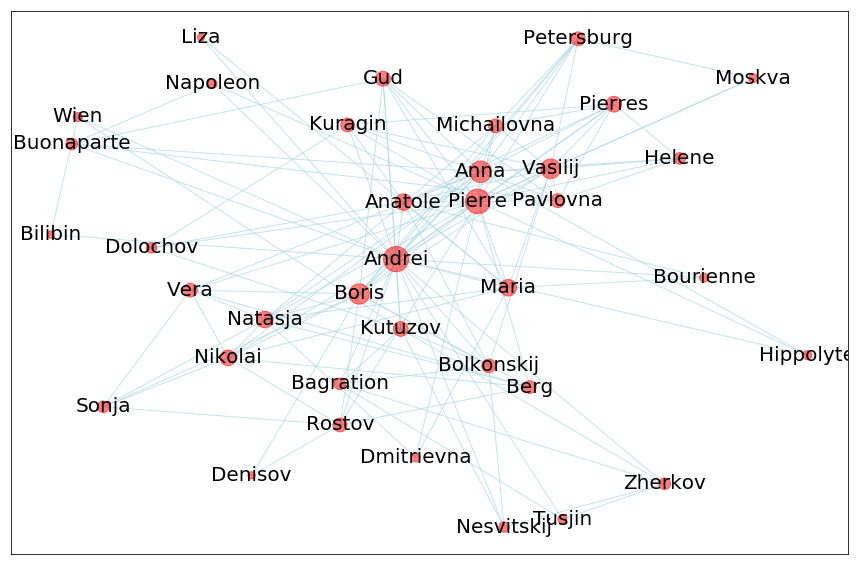

In [82]:
nb.draw_graph_centrality(network, k=2.5)

In [70]:
node_freq = freq(book[0], list(network.nodes()))

In [72]:
nb.draw_graph_centrality??


In [50]:
nb.draw_graph_centrality??

In [57]:
tot = sum(node_freq.values())
for e in node_freq:
    network.node[e]['weight'] = node_freq[e]/tot

In [58]:
network.nodes(data=True)

NodeDataView({'Anatole': {'weight': 0.02021478205938092}, 'Andrei': {'weight': 0.09128237523689198}, 'Anna': {'weight': 0.05969677826910929}, 'Bolkonskij': {'weight': 0.02021478205938092}, 'Bourienne': {'weight': 0.014529374605180037}, 'Dem': {'weight': 0.06696146557169931}, 'Deres': {'weight': 0.04295641187618446}, 'Dolochov': {'weight': 0.02021478205938092}, 'Kuragin': {'weight': 0.007264687302590019}, 'Maria': {'weight': 0.04200884396715098}, 'Pierre': {'weight': 0.09538850284270373}, 'Pierres': {'weight': 0.006948831332912192}, 'Vasilij': {'weight': 0.04390397978521794}, 'Bagration': {'weight': 0.022109917877447885}, 'Bilibin': {'weight': 0.009475679090334808}, 'Boris': {'weight': 0.03979785217940619}, 'Buonaparte': {'weight': 0.014845230574857865}, 'Gud': {'weight': 0.018003790271636132}, 'Hippolyte': {'weight': 0.009791535060012634}, 'Kutuzov': {'weight': 0.035691724573594444}, 'Liza': {'weight': 0.0066329753632343655}, 'Napoleon': {'weight': 0.011054958938723942}, 'Nesvitskij': 

In [55]:
nb.central_characters(network, n=len(network))

[('Andrei', 0.6666666666666666),
 ('Pierre', 0.6153846153846154),
 ('Anna', 0.48717948717948717),
 ('Dem', 0.48717948717948717),
 ('Boris', 0.4358974358974359),
 ('Vasilij', 0.41025641025641024),
 ('Deres', 0.3333333333333333),
 ('Anatole', 0.3076923076923077),
 ('Maria', 0.28205128205128205),
 ('Kutuzov', 0.2564102564102564),
 ('Natasja', 0.2564102564102564),
 ('Nikolai', 0.2564102564102564),
 ('Bolkonskij', 0.23076923076923075),
 ('Pierres', 0.23076923076923075),
 ('Rostov', 0.23076923076923075),
 ('Michailovna', 0.23076923076923075),
 ('Pavlovna', 0.23076923076923075),
 ('Gud', 0.20512820512820512),
 ('Berg', 0.20512820512820512),
 ('Kuragin', 0.1794871794871795),
 ('Buonaparte', 0.1794871794871795),
 ('Nå', 0.1794871794871795),
 ('Petersburg', 0.1794871794871795),
 ('Vera', 0.1794871794871795),
 ('Helene', 0.15384615384615385),
 ('Dolochov', 0.1282051282051282),
 ('Bagration', 0.1282051282051282),
 ('Zherkov', 0.1282051282051282),
 ('Sonja', 0.1282051282051282),
 ('Hippolyte', 0.10